In [1]:
#### Import packages!!!
#import Pkg
#Pkg.add("Plots")
using Plots
#Pkg.add("BenchmarkTools")
using BenchmarkTools
#Pkg.add("Flux")
using Flux
#Pkg.add("CSV")
using CSV
#Pkg.add("DelimitedFiles")
using DelimitedFiles
#Pkg.add("Statistics")
using Statistics
#Pkg.add("StatsBase")
using StatsBase
#Pkg.add("BSON")
using BSON: @save
using BSON: @load
#Pkg.add("Random")
using Random

In [2]:
#### Programming advection scheme: from pgm1.f90
function pgm_ml(x, u1, model, xdim_total, nstep_total, dx, dt)
    
    ## Initialize
    history_2x_learned[:,:,1] = x[:,1,1,1]
    s1_input = x[:,:,:,1]
    #s1_scale = s1_input
    s1_bc = zeros(xdim_total+2)
    
    ## Integrate
    for n in 1:nstep_total-1
        # learned solver
        #coeff_estimated = model(hcat(s1_input, u1[:,:,:,n]))
        coeff_estimated = reshape(model(hcat(s1_input, u1[:,:,:,n])), (xdim_total, 2, 3))
        su = s1_input
        s1_bc = vcat( [su[1]], [su[i] for i in 1:xdim_total], [su[xdim_total]])
        s1_scale = reshape(hcat([s1_bc[i] for i in 1:xdim_total],
                [s1_bc[i] for i in 2:xdim_total+1],
                [s1_bc[i] for i in 3:xdim_total+2]), xdim_total, 3)
        s2_2x = reshape(s1_input, xdim_total) + 100*dt/dx*sum(coeff_estimated[:,1,:].*s1_scale, dims=2) 
                + 10000*(dt*dt)/(dx*dx)*sum(coeff_estimated[:,2,:].*s1_scale, dims=2)
        
        history_2x_learned[:,1,n+1] = s2_2x
        s1_input = reshape(s2_2x, (xdim_total,1,1))
    end
    
    return history_2x_learned
end

pgm_ml (generic function with 1 method)

In [6]:
#### Programming advection scheme with 5 stencil
function pgm_ml(x, u1, model, xdim_total, nstep_total, dx, dt)
    
    ## Initialize
    history_2x_learned[:,:,1] = x[:,1,1,1]
    s1_input = x[:,:,:,1]
    #s1_scale = s1_input
    s1_bc = zeros(xdim_total+4)
    
    ## Integrate
    for n in 1:nstep_total-1
        # learned solver
        #coeff_estimated = model(hcat(s1_input, u1[:,:,:,n]))
        coeff_estimated = reshape(model(hcat(s1_input, u1[:,:,:,n])), (xdim_total, 2, 5))
        su = s1_input
        s1_bc = vcat( [su[1]], [su[1]], [su[i] for i in 1:xdim_total], [su[xdim_total]], [su[xdim_total]])
        s1_scale = reshape(hcat([s1_bc[i] for i in 1:xdim_total],
                [s1_bc[i] for i in 2:xdim_total+1],
                [s1_bc[i] for i in 3:xdim_total+2],
                [s1_bc[i] for i in 4:xdim_total+3],
                [s1_bc[i] for i in 5:xdim_total+4]), xdim_total, 5)
        s2_2x = reshape(s1_input, xdim_total) + 100*dt/dx*sum(coeff_estimated[:,1,:].*s1_scale, dims=2) 
                + 10000*(dt*dt)/(dx*dx)*sum(coeff_estimated[:,2,:].*s1_scale, dims=2)
        
        history_2x_learned[:,1,n+1] = s2_2x
        s1_input = reshape(s2_2x, (xdim_total,1,1))
    end
    
    return history_2x_learned
end

pgm_ml (generic function with 1 method)

In [16]:
#### Programming advection scheme with 7 stencil
function pgm_ml(x, u1, model, xdim_total, nstep_total, dx, dt)
    
    ## Initialize
    history_2x_learned[:,:,1] = x[:,1,1,1]
    s1_input = x[:,:,:,1]
    #s1_scale = s1_input
    #s1_bc = zeros(xdim_total+4)
    
    ## Integrate
    for n in 1:nstep_total-1
        # learned solver
        #coeff_estimated = model(hcat(s1_input, u1[:,:,:,n]))
        coeff_estimated = reshape(model(hcat(s1_input, u1[:,:,:,n])), (xdim_total, 2, 7))
        su = s1_input
        s1_bc = vcat( [su[1]], [su[1]], [su[1]], [su[i] for i in 1:xdim_total], 
            [su[xdim_total]], [su[xdim_total]], [su[xdim_total]])
        s1_scale = reshape(hcat([s1_bc[i] for i in 1:xdim_total],
                [s1_bc[i] for i in 2:xdim_total+1],
                [s1_bc[i] for i in 3:xdim_total+2],
                [s1_bc[i] for i in 4:xdim_total+3],
                [s1_bc[i] for i in 5:xdim_total+4],
                [s1_bc[i] for i in 6:xdim_total+5],
                [s1_bc[i] for i in 7:xdim_total+6]), xdim_total, 7)
        s2_2x = reshape(s1_input, xdim_total) + 100*dt/dx*sum(coeff_estimated[:,1,:].*s1_scale, dims=2) 
                + 10000*(dt*dt)/(dx*dx)*sum(coeff_estimated[:,2,:].*s1_scale, dims=2)
        
        history_2x_learned[:,1,n+1] = s2_2x
        s1_input = reshape(s2_2x, (xdim_total,1,1))
    end
    
    return history_2x_learned
end

pgm_ml (generic function with 1 method)

In [23]:
#### Programming advection scheme with 13 stencil
function pgm_ml(x, u1, model, xdim_total, nstep_total, dx, dt)
    
    ## Initialize
    history_2x_learned[:,:,1] = x[:,1,1,1]
    s1_input = x[:,:,:,1]
    #s1_scale = s1_input
    #s1_bc = zeros(xdim_total+4)
    
    ## Integrate
    for n in 1:nstep_total-1
        # learned solver
        #coeff_estimated = model(hcat(s1_input, u1[:,:,:,n]))
        coeff_estimated = reshape(model(hcat(s1_input, u1[:,:,:,n])), (xdim_total, 2, 13))
        su = s1_input
        s1_bc = vcat( [su[1]], [su[1]], [su[1]], [su[1]], [su[1]], [su[1]], [su[i] for i in 1:xdim_total], 
            [su[xdim_total]], [su[xdim_total]], [su[xdim_total]], [su[xdim_total]], [su[xdim_total]], [su[xdim_total]])
        s1_scale = reshape(hcat([s1_bc[i] for i in 1:xdim_total],
                [s1_bc[i] for i in 2:xdim_total+1],
                [s1_bc[i] for i in 3:xdim_total+2],
                [s1_bc[i] for i in 4:xdim_total+3],
                [s1_bc[i] for i in 5:xdim_total+4],
                [s1_bc[i] for i in 6:xdim_total+5],
                [s1_bc[i] for i in 7:xdim_total+6],
                [s1_bc[i] for i in 8:xdim_total+7],
                [s1_bc[i] for i in 9:xdim_total+8],
                [s1_bc[i] for i in 10:xdim_total+9],
                [s1_bc[i] for i in 11:xdim_total+10],
                [s1_bc[i] for i in 12:xdim_total+11],
                [s1_bc[i] for i in 13:xdim_total+12]), xdim_total, 13)
        s2_2x = reshape(s1_input, xdim_total) + 100*dt/dx*sum(coeff_estimated[:,1,:].*s1_scale, dims=2) 
                + 10000*(dt*dt)/(dx*dx)*sum(coeff_estimated[:,2,:].*s1_scale, dims=2)
        
        history_2x_learned[:,1,n+1] = s2_2x
        s1_input = reshape(s2_2x, (xdim_total,1,1))
    end
    
    return history_2x_learned
end

pgm_ml (generic function with 1 method)

In [ ]:
#### Programming advection scheme with 25 stencil
function pgm_ml(x, u1, model, xdim_total, nstep_total, dx, dt)
    
    ## Initialize
    history_2x_learned[:,:,1] = x[:,1,1,1]
    s1_input = x[:,:,:,1]
    #s1_scale = s1_input
    #s1_bc = zeros(xdim_total+4)
    
    ## Integrate
    for n in 1:nstep_total-1
        # learned solver
        #coeff_estimated = model(hcat(s1_input, u1[:,:,:,n]))
        coeff_estimated = reshape(model(hcat(s1_input, u1[:,:,:,n])), (xdim_total, 2, 25))
        su = s1_input
        s1_bc = vcat( [su[1]], [su[1]], [su[1]], [su[1]], [su[1]], [su[1]], [su[1]], 
                [su[1]], [su[1]], [su[1]], [su[1]], [su[1]], [su[i] for i in 1:xdim_total], 
                [su[xdim_total]], [su[xdim_total]], [su[xdim_total]], [su[xdim_total]], [su[xdim_total]], [su[xdim_total]],
                [su[xdim_total]], [su[xdim_total]], [su[xdim_total]], [su[xdim_total]], [su[xdim_total]], [su[xdim_total]])
        s1_scale = reshape(hcat([s1_bc[i] for i in 1:xdim_total],
                [s1_bc[i] for i in 2:xdim_total+1],
                [s1_bc[i] for i in 3:xdim_total+2],
                [s1_bc[i] for i in 4:xdim_total+3],
                [s1_bc[i] for i in 5:xdim_total+4],
                [s1_bc[i] for i in 6:xdim_total+5],
                [s1_bc[i] for i in 7:xdim_total+6],
                [s1_bc[i] for i in 8:xdim_total+7],
                [s1_bc[i] for i in 9:xdim_total+8],
                [s1_bc[i] for i in 10:xdim_total+9],
                [s1_bc[i] for i in 11:xdim_total+10],
                [s1_bc[i] for i in 12:xdim_total+11],
                [s1_bc[i] for i in 13:xdim_total+12],
                [s1_bc[i] for i in 14:xdim_total+13],
                [s1_bc[i] for i in 15:xdim_total+14],
                [s1_bc[i] for i in 16:xdim_total+15],
                [s1_bc[i] for i in 17:xdim_total+16],
                [s1_bc[i] for i in 18:xdim_total+17],
                [s1_bc[i] for i in 19:xdim_total+18],
                [s1_bc[i] for i in 20:xdim_total+19],
                [s1_bc[i] for i in 21:xdim_total+20],
                [s1_bc[i] for i in 22:xdim_total+21],
                [s1_bc[i] for i in 23:xdim_total+22],
                [s1_bc[i] for i in 24:xdim_total+23],
                [s1_bc[i] for i in 25:xdim_total+24]), xdim_total, 25)
        s2_2x = reshape(s1_input, xdim_total) + 100*dt/dx*sum(coeff_estimated[:,1,:].*s1_scale, dims=2) 
                + 10000*(dt*dt)/(dx*dx)*sum(coeff_estimated[:,2,:].*s1_scale, dims=2)
        
        history_2x_learned[:,1,n+1] = s2_2x
        s1_input = reshape(s2_2x, (xdim_total,1,1))
    end
    
    return history_2x_learned
end

In [10]:
vel_GEOS_Array = readdlm("Vel_GEOS_Jan_2019_NASA_GMAO_10_gdic_16x_1x.csv", ',', Float32);
scalar_GEOS_Array = readdlm("VL_GEOS_Jan_2019_NASA_GMAO_10_gdic_16x_1x.csv", ',', Float32);
scalar_coarse_numerical = readdlm("VanLeer_Coarse_GEOS_Jan_2019_NASA_GMAO_10_gdic_16x_1x.csv", ',', Float32);

xdim = size(vel_GEOS_Array, 1);
nstep = size(vel_GEOS_Array, 2);

Random.seed!(1)
history = (scalar_GEOS_Array*Float32(1e7), vel_GEOS_Array/15);

## Call variables
coeff_estimated = zeros(Float32, xdim,2)
#input = coarse_grained_s_2x[:,:]
s2_2x = convert(Array{Float64}, zeros(xdim))
history_2x_learned = zeros(Float32, xdim, 1, nstep);

input_NN_integrate = zeros(Float32, xdim, 1, 1, nstep-1)
u_NN_integrate = zeros(Float32, xdim, 1, 1, nstep-1)
target_NN_integrate = zeros(Float32, xdim, 1, 1, nstep-1)

input_NN_integrate[:,1,1,:] = history[1][:,1:nstep-1]
u_NN_integrate[:,1,1,:] = history[2][:,1:nstep-1]
target_NN_integrate[:,1,1,:] = history[1][:,2:nstep]

@load "spacing_phys_norm_outputs/CNN_DLR_60EPOCHS_16X1X_VL_GEOS_JAN_2019_NASA_GMAO.bson_MODEL" model
ps = Flux.params(model);

In [11]:
@time CNN_scalar = Float32(1e-7)*pgm_ml(input_NN_integrate, u_NN_integrate, model, xdim, nstep, Float32(27034.3), Float32(300));

  0.186431 seconds (727.38 k allocations: 96.203 MiB, 15.19% gc time)


In [12]:
dim = xdim*nstep 

mae_learned = StatsBase.L1dist(scalar_GEOS_Array, CNN_scalar)/(dim)
rmse_learned = StatsBase.L2dist(scalar_GEOS_Array, CNN_scalar)/sqrt(dim)
r2_learned = Statistics.cor(reshape(scalar_GEOS_Array, dim), reshape(CNN_scalar, dim))^2

mae_numerical = StatsBase.L1dist(scalar_GEOS_Array, scalar_coarse_numerical)/(dim)
rmse_numerical = StatsBase.L2dist(scalar_GEOS_Array, scalar_coarse_numerical)/sqrt(dim)
r2_numerical = Statistics.cor(reshape(scalar_GEOS_Array, dim), reshape(scalar_coarse_numerical, dim))^2
    
println("results: ", "   ", mae_learned, "   ", rmse_learned, "   ", r2_learned)
println("results: ", "   ", mae_numerical, "   ", rmse_numerical, "   ", r2_numerical)

results:    7.362623947401854e-9   1.1297342073115551e-8   0.77732104
results:    2.8055009478668994e-8   3.5097728757193126e-8   0.01102592


┌ Info: Saved animation to 
│   fn = /projects/ctessum/manhop2/advect_NN/1D advection Conv wo physics 0-gradient/animation.gif
└ @ Plots /home/manhop2/.julia/packages/Plots/1KWPG/src/animation.jl:114


Plots.AnimatedGif("/projects/ctessum/manhop2/advect_NN/1D advection Conv wo physics 0-gradient/animation.gif")
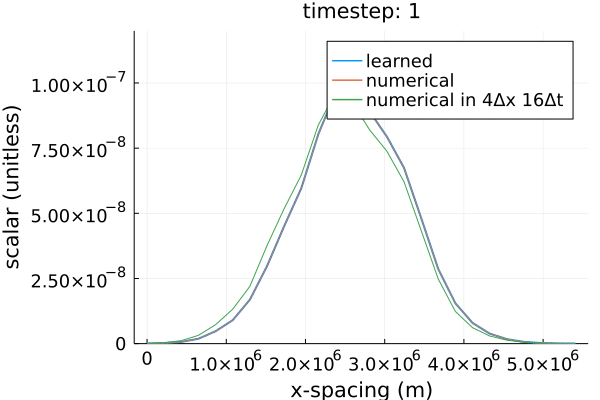

In [9]:
anim = @animate for i ∈ 1:nstep
    plot(0:27034.3*200÷(xdim-1):27034.3*200, CNN_scalar[:,1,i], label = "learned", title = string("timestep: ", string(16*i-15)), 
        xlabel="x-spacing (m)", ylabel="scalar (unitless)", xlabelfontsize=14, ylabelfontsize=14, 
        xtickfontsize=12, ytickfontsize=12, legendfontsize=12, width=2, ylims=(0.0, 1.2e-7))
    #, ylims=(0.0, 1.2e-7)
    plot!(0:27034.3*200÷(xdim-1):27034.3*200, scalar_GEOS_Array[:,i], label = "numerical")
    plot!(0:27034.3*200÷(xdim-1):27034.3*200, scalar_coarse_numerical[:,i], label = "numerical in 4Δx 16Δt")
end
gif(anim, "animation.gif", fps = 15)

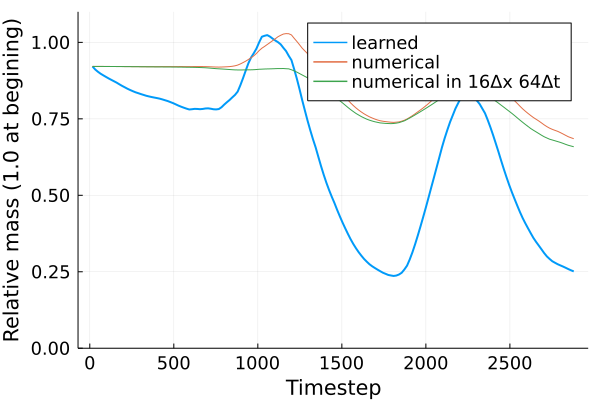

In [9]:
begin
    Learned_Mass = zeros(Float32, nstep)
    Numerical_Mass = zeros(Float32, nstep)
    Numerical_Coarsened_Mass = zeros(Float32, nstep)
    for i in 1:nstep
        Learned_Mass[i] = sum(CNN_scalar[:,1,i])*3/xdim*1e7
        Numerical_Mass[i] = sum(scalar_GEOS_Array[:,i])*3/xdim*1e7
        Numerical_Coarsened_Mass[i] = sum(scalar_coarse_numerical[:,i])*3/xdim*1e7
    end
    plot(2880÷nstep:2880÷nstep:2880, Learned_Mass, width=2, label = "learned", xlabel = "Timestep", ylabel = "Relative mass (1.0 at begining)",
    xlabelfontsize=14, ylabelfontsize=14, xtickfontsize=12, ytickfontsize=12, legendfontsize=12, ylims=(0.0, 1.1))
    plot!(2880÷nstep:2880÷nstep:2880, Numerical_Mass, label = "numerical")
    plot!(2880÷nstep:2880÷nstep:2880, Numerical_Coarsened_Mass, label = "numerical in 16Δx 64Δt")
end

#savefig("plot.png")

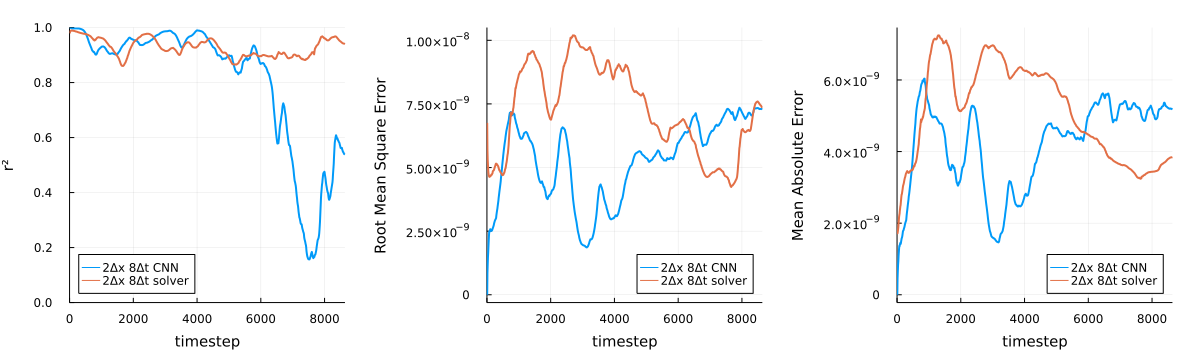

In [90]:
# metric plot - 2x in space and 8x in time
begin
    r2_CNN = zeros(Float32, 360*3)
    r2_solver = zeros(Float32, 360*3)
    for i in 1:360*3
        r2_CNN[i] = Statistics.cor(scalar_GEOS_Array_downsample_2x_8x[:,i]*Float32(1e-7), CNN_scalar_2x_8x[:,1,i]*Float32(1e-7))^2
        r2_solver[i] = Statistics.cor(scalar_GEOS_Array_downsample_2x_8x[:,i]*Float32(1e-7), scalar_GEOS_Array_2x_8x[:,i])^2
    end
    
    L2_norm_CNN = zeros(Float32, 360*3)
    L2_norm_solver = zeros(Float32, 360*3)
    for i in 1:360*3
        L2_norm_CNN[i] = StatsBase.L2dist(scalar_GEOS_Array_downsample_2x_8x[:,i]*Float32(1e-7), CNN_scalar_2x_8x[:,1,i]*Float32(1e-7))/sqrt(101)
        L2_norm_solver[i] = StatsBase.L2dist(scalar_GEOS_Array_downsample_2x_8x[:,i]*Float32(1e-7), scalar_GEOS_Array_2x_8x[:,i])/sqrt(101)
    end
    
    L1_norm_CNN = zeros(Float32, 360*3)
    L1_norm_solver = zeros(Float32, 360*3)
    for i in 1:360*3
        L1_norm_CNN[i] = StatsBase.L1dist(scalar_GEOS_Array_downsample_2x_8x[:,i]*Float32(1e-7), CNN_scalar_2x_8x[:,1,i]*Float32(1e-7))/101
        L1_norm_solver[i] = StatsBase.L1dist(scalar_GEOS_Array_downsample_2x_8x[:,i]*Float32(1e-7), scalar_GEOS_Array_2x_8x[:,i])/101
    end
    
    p1 = begin plot(8:8:2880*3, r2_CNN, width=2, label="2Δx 8Δt CNN", xlabel="timestep", ylabel="r²", xlabelfontsize=10, ylabelfontsize=10,
        xtickfontsize=8, ytickfontsize=8, xlims=(0,2880*3), ylims=(0.0,1.0), legendfontsize=8, legend=:bottomleft)
        plot!(8:8:2880*3, r2_solver, width=2, label="2Δx 8Δt solver") end
    
    p2 = begin plot(8:8:2880*3, L2_norm_CNN, width=2, label="2Δx 8Δt CNN", xlabel="timestep", ylabel="Root Mean Square Error", xlabelfontsize=10, ylabelfontsize=10,
        xtickfontsize=8, ytickfontsize=8, xlims=(0,2880*3), legendfontsize=8, legend=:bottomright)
        plot!(8:8:2880*3, L2_norm_solver, width=2, label="2Δx 8Δt solver") end
    
    p3 = begin plot(8:8:2880*3, L1_norm_CNN, width=2, label="2Δx 8Δt CNN", xlabel="timestep", ylabel="Mean Absolute Error", xlabelfontsize=10, ylabelfontsize=10,
        xtickfontsize=8, ytickfontsize=8, xlims=(0,2880*3), legendfontsize=8, legend=:bottomright)
        plot!(8:8:2880*3, L1_norm_solver, width=2, label="2Δx 8Δt solver") end
    
    plot(p1, p2, p3, layout = (1, 3), size = (1200,350), left_margin=5Plots.mm, right_margin=5Plots.mm, 
        top_margin=5Plots.mm, bottom_margin=5Plots.mm)
end
#savefig("metric_plot_2x_8x_CNN.png")